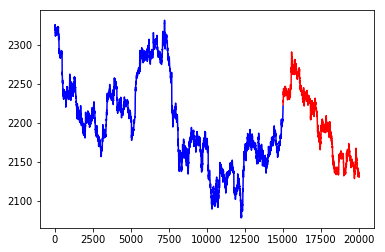

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
import yaml
import matplotlib.pyplot as plt

sys.path.append("./")
from Finance.Env import Loader
from Finance.ReplayBuffer import ReplayBuffer

# Load data
loader = Loader("data/")
data, info = loader.load("000300")
# data_DDRLFFSR is start from 2014.1.1, the 407760th point in data
data_DDRLFFSR = data[407760:407760+20000]

# Use first 15000 point to train AC-model
train = data_DDRLFFSR[:15000].close.values
test = data_DDRLFFSR[15000:].close.values

plt.plot(np.linspace(0,14999,15000),train,color="blue")
plt.plot(np.linspace(15000,19999,5000),test,color="red")
plt.show()



In [2]:
# Build Actor-Critic Model
from Finance.PolicyNetwork import ActorNetwork, CriticNetwork

# Load Network Config
model_config = yaml.load(open("config/model.yaml"))
an_config = yaml.load(open("config/an_config.yaml"))
an_config.update(model_config)

cn_config = yaml.load(open("config/cn_config.yaml"))
cn_config.update(model_config)

# Optimize GPU
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# Build Network
actor = ActorNetwork(sess, an_config)
critic = CriticNetwork(sess, cn_config)

actor.describe("images/actor_network.png")
critic.describe("images/critic_network.png")

Using TensorFlow backend.


Build ActorNetwork
Build ActorNetwork
Build CriticNetwork
Build CriticNetwork
ActorNetwork:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
State_Input (InputLayer)     (None, 50)                0         
_________________________________________________________________
Hidden_Layer0 (Dense)        (None, 128)               6528      
_________________________________________________________________
Hidden_Layer1 (Dense)        (None, 128)               16512     
_________________________________________________________________
Action_Output (Dense)        (None, 1)                 129       
Total params: 23,169
Trainable params: 23,169
Non-trainable params: 0
_________________________________________________________________
CriticNetwork:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #    

In [ ]:
# Training
EPISODE = 2000
BUFFER_SIZE = 4096
BATCH_SIZE = 128
TRADING_RANGE = 20000 # minutes

# epsilon-greedy
EXPLORE = 100000.
epsilon = 1.

state_size = model_config["state_size"]
action_size = model_config["action_size"]

env = Env(data[407760:].close.values)

for i in range(EPISODE):
    print("Eposide: " + str(i))
    
    total_reward = 0
    state = env.reset()
    
    for j in range(TRADING_RANGE):
        epsilon -= 1./EXPLORE
        action = np.zeros([1, action_size])
        
        action = actor.model.predict([state])